# Analise Temporal

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib as plt
from prophet import Prophet

In [5]:
#Baixar dados dos quatro últimos anos para uma ação específica
dados = yf.download("JNJ", start ="2020-01-01", end="2023-12-31", progress = False)
dados =dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198914,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [6]:
# Vamos dividir os dados em treino ( até o final do primeiro semestre de 2023)e teste (segundo semestre de 2023)

dados_treino = dados[dados['Date']<'2023-07-31']
dados_teste = dados[dados['Date']>='2023-07-31']

In [10]:
#Preparando os dados para o Prophet
dados_prophet_treino = dados_treino[['Date','Close']].rename(columns={'Date': 'ds','Close':'y'})

In [11]:
#Criar e treinar modelo

modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)
modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpjqimkudt/k1ebp6lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjqimkudt/_qymal5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77489', 'data', 'file=/tmp/tmpjqimkudt/k1ebp6lg.json', 'init=/tmp/tmpjqimkudt/_qymal5q.json', 'output', 'file=/tmp/tmpjqimkudt/prophet_modelxq79n6fo/prophet_model-20240329161455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:14:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
#Criar datas futuras para a previsão ate´ o final de 2023

futuro= modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),Christmas Day (observed)_lower,Christmas Day (observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (observed),Independence Day (observed)_lower,Independence Day (observed)_upper,Juneteenth National Independence Day,Juneteenth National Independence Day_lower,Juneteenth National Independence Day_upper,Juneteenth National Independence Day (observed),Juneteenth National Independence Day (observed)_lower,Juneteenth National Independence Day (observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (observed),New Year's Day (observed)_lower,New Year's Day (observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (observed),Veterans Day (observed)_lower,Veterans Day (observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,144.922133,155.974041,146.122755,146.122755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.384438,4.384438,4.384438,0.0,0.0,0.0,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,145.341998,155.873945,146.098731,146.098731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.323857,4.323857,4.323857,0.0,0.0,0.0,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.032991,154.723300,146.026658,146.026658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.279295,3.279295,3.279295,0.0,0.0,0.0,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.666737,154.463455,146.002633,146.002633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.236156,3.236156,3.236156,0.0,0.0,0.0,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,144.121070,154.582174,145.978609,145.978609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.176450,3.176450,3.176450,0.0,0.0,0.0,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,143.564225,164.425314,139.781019,158.675627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.856939,4.856939,4.856939,0.0,0.0,0.0,0.2544

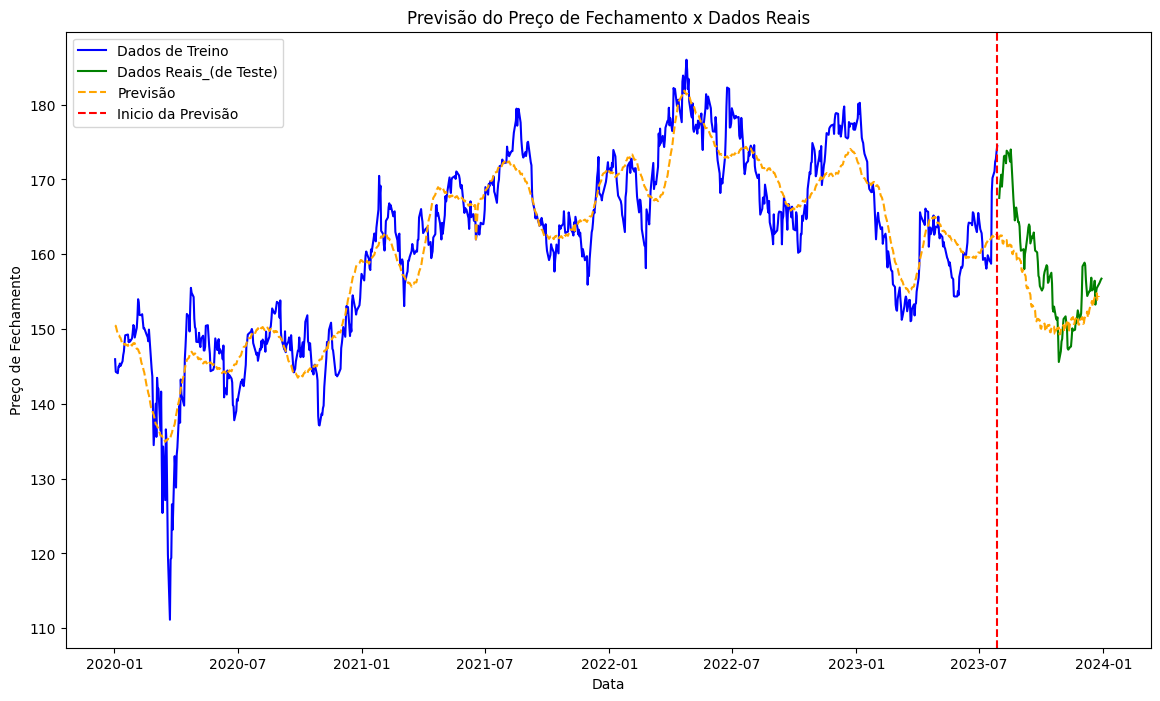

In [20]:
import matplotlib.pyplot as plt

# Plot training data
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino',color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais_(de Teste)',color='green')
plt.plot(previsao['ds'],previsao['yhat'], label='Previsão',color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), label='Inicio da Previsão', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão do Preço de Fechamento x Dados Reais')
plt.legend()
plt.show()